# 🎯 **Predictive Analytics for Identifying High-Risk Employees for Turnover Based on Compensation Factors**

---

## 📊 **Introduction**

Welcome to the **Predictive Analytics Project** where we analyze employee compensation data to predict the risk of employee turnover. Our goal is to preprocess and clean the dataset for future modeling by handling missing data, duplicates, outliers, and scaling.

This notebook will guide you through the following steps:
- Data Understanding
- Missing Data Handling
- Duplicate Removal
- Data Transformation (Encoding & Scaling)
- Outlier Detection
- Feature Selection

---

## 🔍 **1. Data Understanding** 🧐

### **Objective:**
Understand the structure of the dataset to identify potential issues such as missing values, data types, and basic statistics.

### 📌 **Key Steps:**
- Load the dataset
- Display basic information and summary statistics




In [2]:
import pandas as pd

# Load the dataset (assuming it is in CSV format)
df = pd.read_csv('C:\\Users\\ZAIN NIZAR YOUSAF\\Downloads\\Dataset.csv')


In [5]:
# Show the first few rows of the dataset
print(df.head())


           Person Name                Organization                      Job  \
0    Amis, Beatrice J.  PN - Neighborhood Services       Front Desk/Cashier   
1     Blight, Linda A.  PN - Neighborhood Services            Instructor  3   
2          Bowden, Tim          PW - Environmental  Sr Maintenance Mechanic   
3       Burton, Robert     PN - Parks & Recreation                  Monitor   
4  Cisneros, Alejandro     PN - Parks & Recreation            Instructor  3   

  Work Group  Gross Wages  Base Salary Longevity Pay  Overtime     Other  \
0       HRLY   $8,122.36    $8,122.36         $0.00     $0.00     $0.00    
1       HRLY   $3,516.25    $3,516.25         $0.00     $0.00     $0.00    
2        CEA  $86,965.55   $76,514.36     $7,651.57   $127.02   $125.00    
3       HRLY   $4,232.29    $4,232.29         $0.00     $0.00     $0.00    
4       HRLY   $1,120.00    $1,120.00         $0.00     $0.00     $0.00    

  Seperation Pay Annual Buybacks PERS Contributions ER Paid Other Be

## 💡**Explanation**:
##### df.head() gives a quick look at the first 5 rows of the data.
##### df.info() provides data types and non-null value counts.
##### df.describe() shows summary statistics for numerical features.

In [6]:
# Show summary information about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22115 entries, 0 to 22114
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Person Name         22115 non-null  object
 1   Organization        22115 non-null  object
 2   Job                 22115 non-null  object
 3   Work Group          22115 non-null  object
 4   Gross Wages         22111 non-null  object
 5   Base Salary         22104 non-null  object
 6   Longevity Pay       15370 non-null  object
 7   Overtime            16213 non-null  object
 8   Other               17887 non-null  object
 9   Seperation Pay      11433 non-null  object
 10  Annual Buybacks     14803 non-null  object
 11  PERS Contributions  15547 non-null  object
 12  ER Paid             18863 non-null  object
 13  Other Benefits      22115 non-null  object
 14  Year Ending         22115 non-null  object
dtypes: object(15)
memory usage: 2.5+ MB
None


In [7]:
# Show statistical details about the numerical columns
print(df.describe())

           Person Name      Organization                     Job Work Group  \
count            22115             22115                   22115      22115   
unique            6338               126                     585         16   
top     Wood, David R.  FR - Suppression  Safekey Site Assistant        CEA   
freq                 9              3485                    1641       7416   

       Gross Wages Base Salary Longevity Pay Overtime   Other Seperation Pay  \
count        22111       22104         15370    16213   17887          11433   
unique       20931       19380          7368     9829    7353            865   
top     $5,944.43   $5,944.43         $0.00    $0.00   $0.00          $0.00    
freq            22          24          6373     6040    4623          10566   

       Annual Buybacks PERS Contributions ER Paid Other Benefits  \
count            14803              15547   18863          22115   
unique            6129              13110    1155           4836   

# Handle Missing Data 🚨

## Objective:
Missing data can significantly impact the quality of your analysis and lead to inaccurate or biased results. This section outlines the steps for identifying and handling missing values in your dataset to ensure better-quality analysis and model predictions.

## Steps:

### 1. **Identify Missing Values**:
- The first step is to detect missing values in your dataset. 
- Use functions like `.isnull()` or `.isna()` in pandas to check which columns or rows have missing data.

### 2. **Impute Missing Values**:
- After identifying missing data, the next step is to handle it.
  
  **For Numerical Data:**
  - Impute missing values using the **mean** or **median** of the respective column. Choose the median if the data is skewed.

  **For Categorical Data:**
  - Impute missing values using the **mode** (most frequent value) of the column.

  Imputation allows you to retain your dataset's size and prevents losing valuable information.

### 3. **Alternatively, Remove Missing Data**:
- If missing data is too extensive or imputation is not suitable, you may consider removing rows or columns with missing values.
  
  **Remove Rows:**
  - If only a few rows have missing values, drop those rows using `.dropna()`.
  
  **Remove Columns:**
  - If a column has too many missing values, consider dropping the entire column to avoid the risk of misleading analysis.

---

By following these steps, you can effectively manage missing data and improve the quality of your analysis or predictive models.


In [8]:
# Identify missing values
print(df.isnull().sum())

Person Name               0
Organization              0
Job                       0
Work Group                0
Gross Wages               4
Base Salary              11
Longevity Pay          6745
Overtime               5902
Other                  4228
Seperation Pay        10682
Annual Buybacks        7312
PERS Contributions     6568
ER Paid                3252
Other Benefits            0
Year Ending               0
dtype: int64


In [10]:
# Separate numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
# Impute numeric columns with the median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# For non-numeric columns, handle missing values
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# For categorical (non-numeric) columns, impute with the mode (most frequent value)
for col in non_numeric_cols:
    df[col] = df[col].fillna(df[col].mode()[0])  # Use the mode for imputation


# Handling Missing Data Explanation

## `df.isnull().sum()`:
- **Purpose**: This function is used to identify missing (null) values in your dataset.
- **Description**: It returns the number of missing values for each column in the DataFrame. This is useful for determining which columns have missing data and understanding the extent of missing values.
- **Importance**: It's crucial to check for any columns with a significant proportion of missing data, as they can affect the quality of your analysis.

## Strategies for Handling Missing Data:

### 1. **For Numerical Columns**:
- **Imputation with Median**:  
  - We typically impute missing values in numerical columns using the **median**. The median is a more robust measure than the mean because it is less sensitive to outliers.
  - **Why Median**: Outliers can skew the mean, leading to incorrect imputation. The median provides a more accurate central tendency for data that is not normally distributed.

### 2. **For Categorical Columns**:
- **Imputation with Mode**:  
  - For categorical columns, we use the **mode** (the most frequent value) to fill in missing data.
  - **Why Mode**: The mode represents the most common category in the data and is a reasonable choice for imputing missing categorical values, as it ensures that the imputed values align with the existing distribution of categories.


# 🔄 3. Handle Duplicates 🔁

## Objective:
Duplicate rows in the dataset can distort the analysis, leading to biased results. It is essential to check for and remove duplicate rows.

## 📌 Steps:
1. **Identify Duplicates**: 
   - Check for duplicate rows using the `duplicated()` function.
2. **Remove Duplicates**: 
   - If any duplicates are found, remove them from the dataset using the `drop_duplicates()` function.

### Python Code:
```python
# Identify duplicate rows
duplicates = df.duplicated().sum()
duplicates


In [16]:
# Check for duplicate rows
duplicates = df.duplicated().sum()

# Remove duplicate rows if any
df_no_duplicates = df.drop_duplicates()

duplicates

0

## Explanation:
- **`df.duplicated().sum()`**: 
  - This function checks for duplicate rows in the DataFrame. It returns the number of rows that are duplicates (excluding the first occurrence).
  - If any rows are repeated, they can be removed using the **`drop_duplicates()`** function.
  
- **Removing duplicates** ensures that the dataset only contains unique records, preventing biased analyses or overrepresentation of certain data points. By eliminating duplicates, we maintain the integrity of the data, ensuring that no particular record skews the results or contributes disproportionately to the model.

  ----

# ⚙️ 4. Data Transformation 🔄

## Objective:
Data transformation is essential for making the data suitable for machine learning models. It involves encoding categorical features and scaling numerical features.

### Step 1: Encoding Categorical Variables 🎭
Categorical features like **Organization** and **Job** need to be converted into numerical formats to be used in machine learning models. We will use **One-Hot Encoding** and **Label Encoding**.

#### One-Hot Encoding:
One-Hot Encoding creates new columns representing each category as binary values (0 or 1).

### Label Encoding:
Label Encoding converts categories into integers, where each unique category is assigned a unique integer.


In [20]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Organization', 'Job'])
# View the result
print(df_encoded.head()) 

# Alternatively, use LabelEncoder for integer encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Organization'] = le.fit_transform(df['Organization'])
df['Job'] = le.fit_transform(df['Job'])
# View the result
print(df.head())  # Shows the first 5 rows of the DataFrame


           Person Name Work Group  Gross Wages  Base Salary Longevity Pay  \
0    Amis, Beatrice J.       HRLY   $8,122.36    $8,122.36         $0.00    
1     Blight, Linda A.       HRLY   $3,516.25    $3,516.25         $0.00    
2          Bowden, Tim        CEA  $86,965.55   $76,514.36     $7,651.57    
3       Burton, Robert       HRLY   $4,232.29    $4,232.29         $0.00    
4  Cisneros, Alejandro       HRLY   $1,120.00    $1,120.00         $0.00    

   Overtime     Other Seperation Pay Annual Buybacks PERS Contributions  ...  \
0    $0.00     $0.00          $0.00           $0.00              $0.00   ...   
1    $0.00     $0.00          $0.00           $0.00              $0.00   ...   
2  $127.02   $125.00          $0.00       $2,547.60         $21,235.98   ...   
3    $0.00     $0.00          $0.00           $0.00              $0.00   ...   
4    $0.00     $0.00          $0.00           $0.00              $0.00   ...   

  Job_575 Job_576 Job_577  Job_578  Job_579  Job_580  Jo

### Step 2: Scaling Numerical Features 📏
For machine learning models that are sensitive to the scale of features (e.g., logistic regression, support vector machines), we scale numerical features to have the same range or distribution. This is crucial because features with different scales can negatively impact model performance, especially for algorithms that rely on distance metrics.

We will use **StandardScaler**, which transforms features to have:
- A **mean of 0**.
- A **standard deviation of 1**.

This ensures that each feature contributes equally to the model, preventing some features with larger values from dominating others.

#### Why Use StandardScaler?
- **StandardScaler** normalizes the data so that the distribution of the data has a mean of 0 and a standard deviation of 1. This scaling method is particularly useful when features vary widely in magnitude, for example, salary (thousands of dollars) vs. years of experience (tens of years).
- StandardScaler assumes that your data follows a Gaussian (normal) distribution. If your data is not normally distributed, it can still work well for many machine learning models but may not always be ideal.




In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_cols = ['Gross Wages', 'Base Salary', 'Longevity Pay', 'Overtime', 'Other',  
                  'Annual Buybacks', 'PERS Contributions', 'ER Paid', 'Other Benefits']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


# Check the result
print(df.head())


           Person Name  Organization  Job Work Group  Gross Wages  \
0    Amis, Beatrice J.           108  250       HRLY    -1.132182   
1     Blight, Linda A.           108  292       HRLY    -1.226340   
2          Bowden, Tim           119  507        CEA     0.479520   
3       Burton, Robert           110  350       HRLY    -1.211702   
4  Cisneros, Alejandro           110  292       HRLY    -1.275323   

   Base Salary  Longevity Pay  Overtime     Other Seperation Pay  \
0    -1.176853      -0.704827 -0.466569 -0.573556         $0.00    
1    -1.300806      -0.704827 -0.466569 -0.573556         $0.00    
2     0.663619       1.732638 -0.456462 -0.514176         $0.00    
3    -1.281537      -0.704827 -0.466569 -0.573556         $0.00    
4    -1.365291      -0.704827 -0.466569 -0.573556         $0.00    

   Annual Buybacks  PERS Contributions   ER Paid  Other Benefits  \
0        -0.365188           -0.972838 -0.692193       -0.130302   
1        -0.365188           -0.972838 -

### Explanation:
- **One-Hot Encoding**: This technique is suitable when categorical variables have a small number of distinct categories. It converts each category value into a separate binary column, ensuring that no ordinal relationships are implied between categories.
  
- **Label Encoding**: This method works well when there is an ordinal relationship between categories (e.g., Low, Medium, High). It assigns an integer to each category, preserving the order of the categories.

- **StandardScaler**: StandardScaler is crucial for scaling numerical features with different units or ranges (e.g., salary vs. benefits). By standardizing the features to have a mean of 0 and a standard deviation of 1, it ensures that each feature contributes equally to the model and avoids biased predictions due to differences in magnitude.

---


In [42]:
from scipy import stats

# Calculate Z-scores for numerical columns
z_scores = stats.zscore(df[numerical_cols])

# Identify outliers (Z-score > 3 is considered an outlier)
outliers = (z_scores > 3).sum(axis=0)

# Remove outliers (Z-score <= 3)
df_no_outliers = df[(z_scores < 3).all(axis=1)]

# Print the result after removing outliers
print("DataFrame after removing outliers:")
print(df_no_outliers.head())

DataFrame after removing outliers:
           Person Name  Organization  Job Work Group  Gross Wages  \
0    Amis, Beatrice J.           108  250       HRLY    -1.132182   
1     Blight, Linda A.           108  292       HRLY    -1.226340   
2          Bowden, Tim           119  507        CEA     0.479520   
3       Burton, Robert           110  350       HRLY    -1.211702   
4  Cisneros, Alejandro           110  292       HRLY    -1.275323   

   Base Salary  Longevity Pay  Overtime     Other Seperation Pay  \
0    -1.176853      -0.704827 -0.466569 -0.573556         $0.00    
1    -1.300806      -0.704827 -0.466569 -0.573556         $0.00    
2     0.663619       1.732638 -0.456462 -0.514176         $0.00    
3    -1.281537      -0.704827 -0.466569 -0.573556         $0.00    
4    -1.365291      -0.704827 -0.466569 -0.573556         $0.00    

   Annual Buybacks  PERS Contributions   ER Paid  Other Benefits  \
0        -0.365188           -0.972838 -0.692193       -0.130302   
1    

----
### ⚠️ 5. Handle Outliers ⚠️

#### Objective:
Outliers are extreme values that can distort the results of statistical analysis and predictive models. These extreme values can create bias, reduce the accuracy of predictions, and mislead the model. Handling outliers is essential to ensure that the dataset is representative of the majority of the data and that the model performs effectively.

#### 📌 Steps:
1. **Identify outliers using IQR (Interquartile Range)**:
   The Interquartile Range (IQR) method is a common statistical technique for detecting outliers. It calculates the range between the first (Q1) and third (Q3) quartiles of the data. Any data points outside the range of \(Q1 - 1.5 \times IQR\) and \(Q3 + 1.5 \times IQR\) are considered outliers.

2. **Remove or cap outliers**:
   Once outliers are identified, they can be:
   - **Removed**: Rows containing outliers are excluded from the dataset to avoid their effect on the analysis.
   - **Capped**: Outlier values can be capped to a predefined threshold, reducing their impact without losing the data entirely.

In [43]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define acceptable range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[((df[numerical_cols] >= lower_bound) & (df[numerical_cols] <= upper_bound)).all(axis=1)]


### Explanation:

#### Interquartile Range (IQR):
- The **Interquartile Range (IQR)** is a statistical measure used to identify outliers in a dataset. It is calculated as the difference between the first quartile (Q1) and the third quartile (Q3).
- **Q1** (25th percentile) represents the value below which 25% of the data points fall.
- **Q3** (75th percentile) represents the value below which 75% of the data points fall.
  
  The IQR formula is:
  \[
  \text{IQR} = Q3 - Q1
  \]

- **Outlier Detection**: Data points that fall outside the range of:
  \[
  Q1 - 1.5 \times \text{IQR} \quad \text{and} \quad Q3 + 1.5 \times \text{IQR}
  \]
  are considered **outliers**. These values are often considered extreme and can skew the analysis or model performance.

#### Removing Outliers:
- **Exclusion**: Rows containing outliers are excluded from the dataset to ensure that extreme values do not distort the statistical analysis or model results.
- By removing or capping these outliers, the dataset becomes more representative of the majority of the data, leading to more accurate and reliable analyses or predictions.

-----

# Plot boxplot before removing outliers

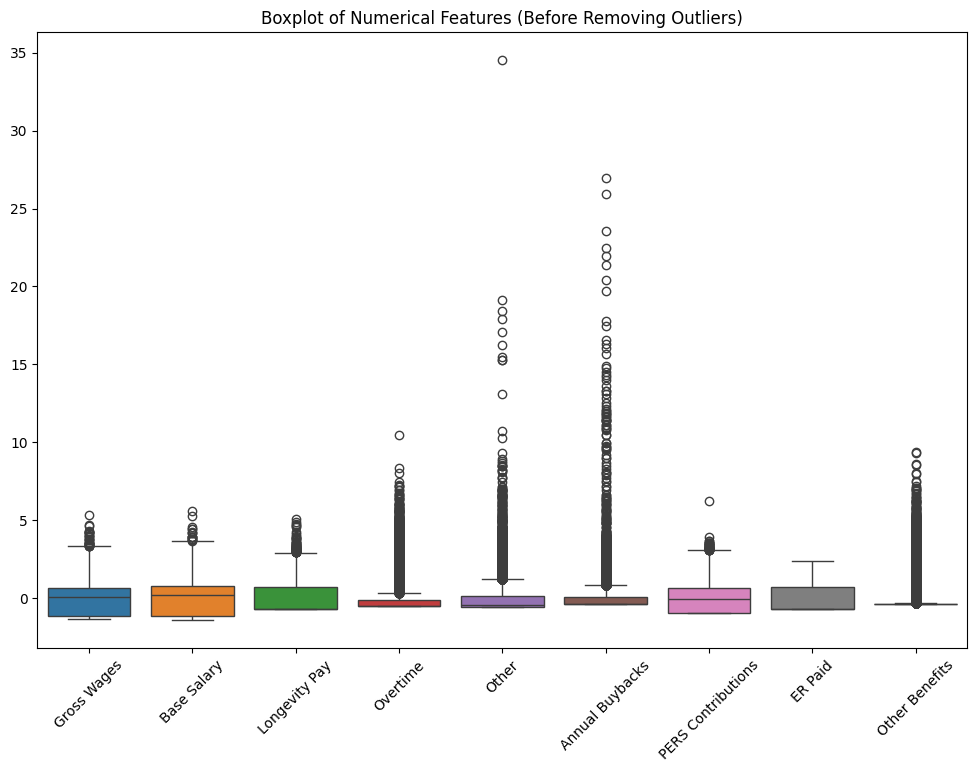

In [44]:
#Before Removing Outliers:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplot before removing outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot of Numerical Features (Before Removing Outliers)')
plt.xticks(rotation=45)
plt.show()

# Plot boxplot after removing outliers

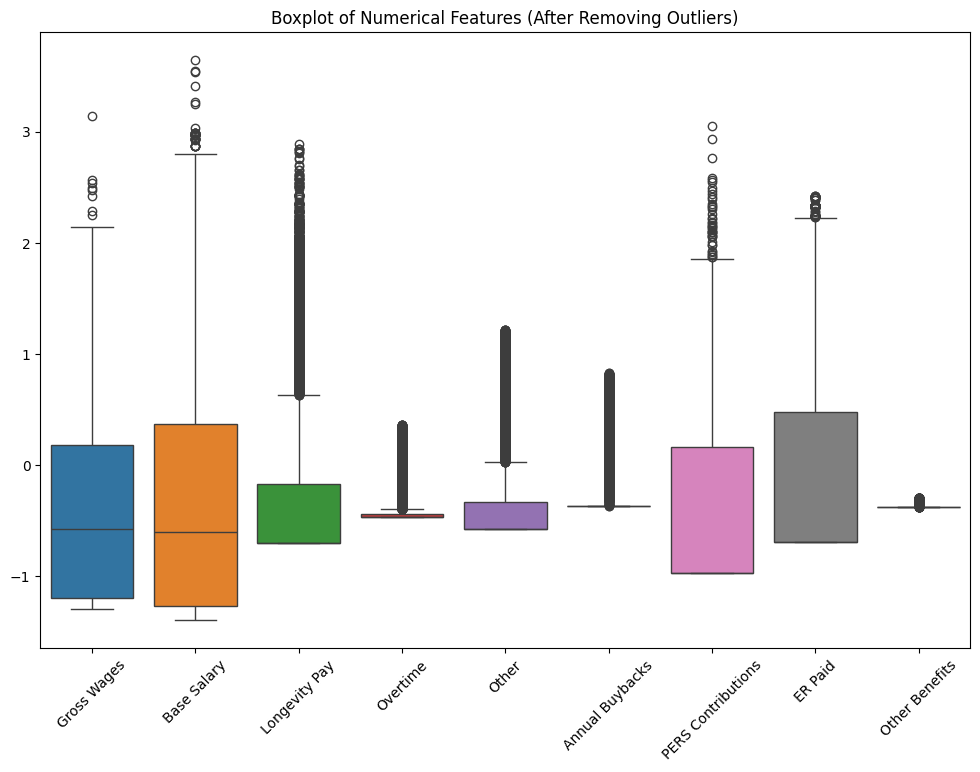

In [45]:
# Plot boxplot after removing outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_no_outliers[numerical_cols])
plt.title('Boxplot of Numerical Features (After Removing Outliers)')
plt.xticks(rotation=45)
plt.show()


## 📈 7. Visualizations 📊

### Objective:
Visualizations are essential for uncovering insights from the data and identifying trends, distributions, and relationships between variables. They allow for a clearer understanding of the underlying patterns in the dataset, making it easier to interpret the results and communicate findings effectively.

### Common Types of Visualizations:

1. **Histograms**: 
   - Used to visualize the distribution of a numerical variable.
   - Helps to understand the spread and frequency of values within a specific range.

2. **Box Plots**:
   - Display the distribution of data through quartiles, highlighting the median, range, and potential outliers.
   - Useful for detecting outliers and comparing distributions across categories.

3. **Scatter Plots**:
   - Help to examine relationships between two continuous variables.
   - Can highlight correlations and trends between variables.

4. **Correlation Heatmap**:
   - Used to visualize the correlation matrix of numerical features.
   - Highlights the strength and direction of relationships between variables, assisting in feature selection.

5. **Bar Charts**:
   - Useful for visualizing categorical data and comparing frequencies across categories.
   - Can help identify patterns and imbalances in categorical features.

6. **Pair Plots**:
   - Display pairwise relationships between multiple numerical variables.
   - Provides an overview of interactions between different features.



# Plot histograms for numerical columns

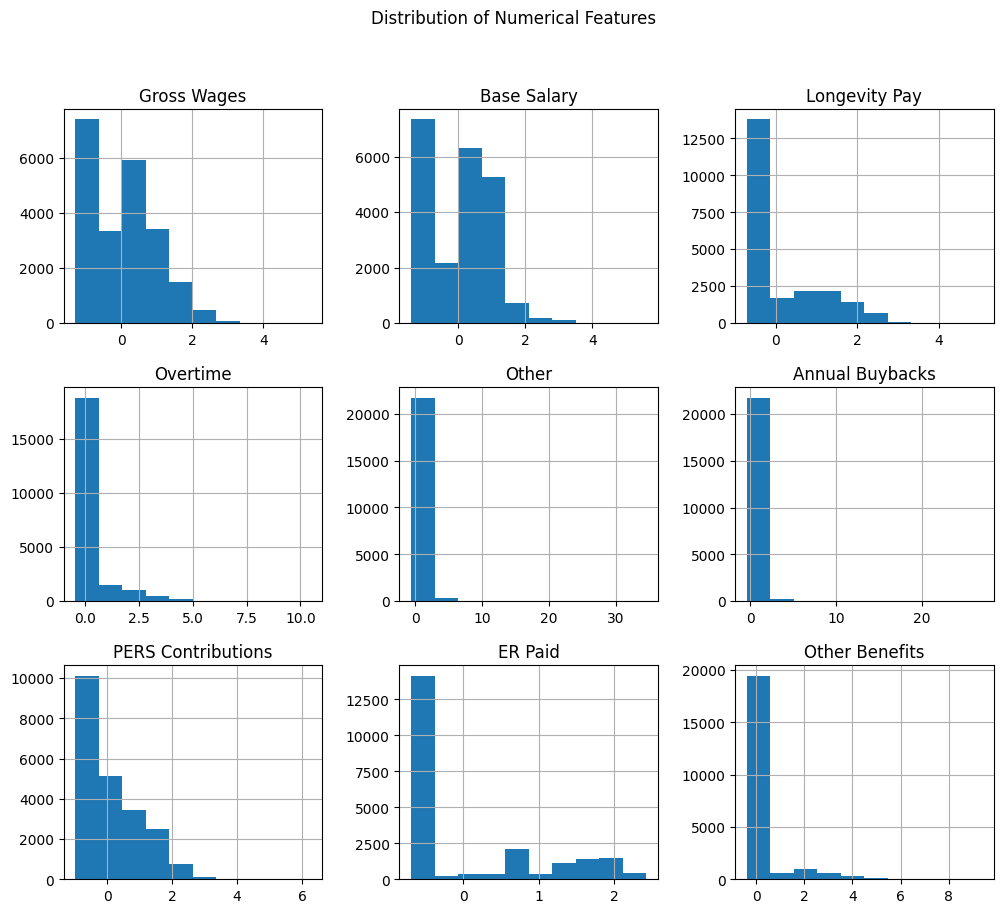

In [46]:
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
df[numerical_cols].hist(figsize=(12, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()


# Plot the heatmap

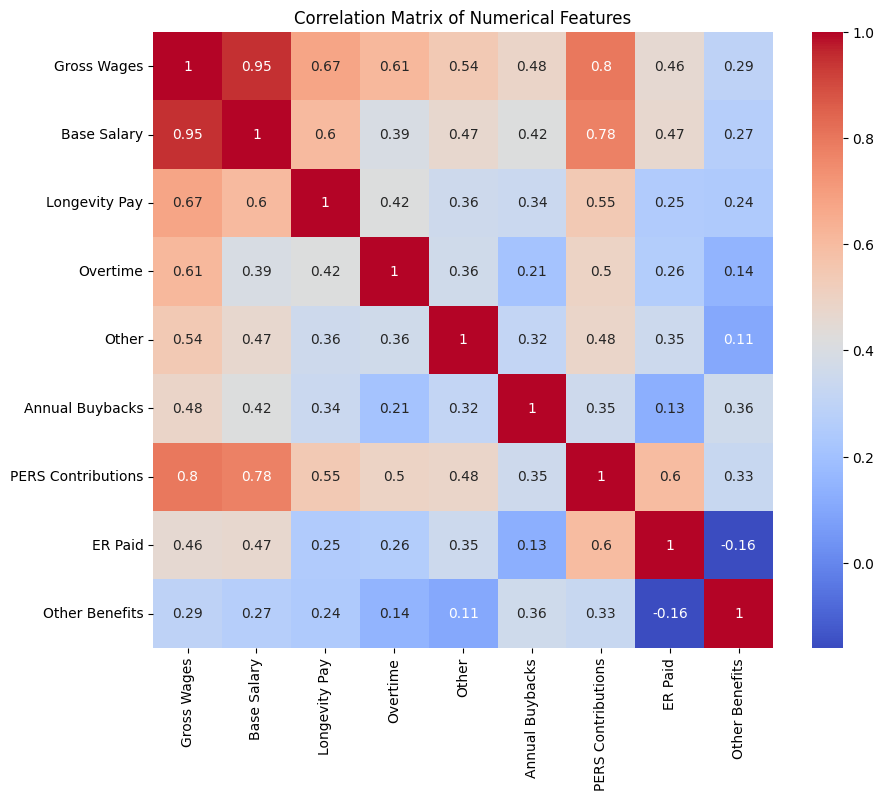

In [47]:
import seaborn as sns

# Calculate correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# Boxplot to Detect Outliers

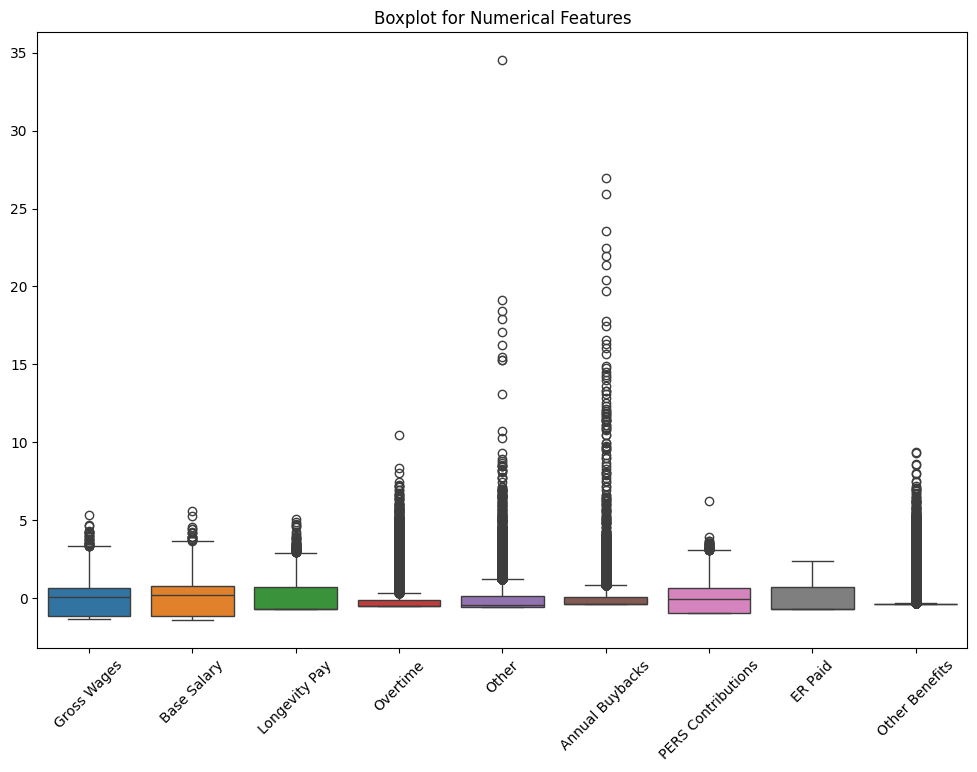

In [48]:
#Boxplot to Detect Outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot for Numerical Features')
plt.xticks(rotation=45)
plt.show()


# Bar Plot of Categorical Features

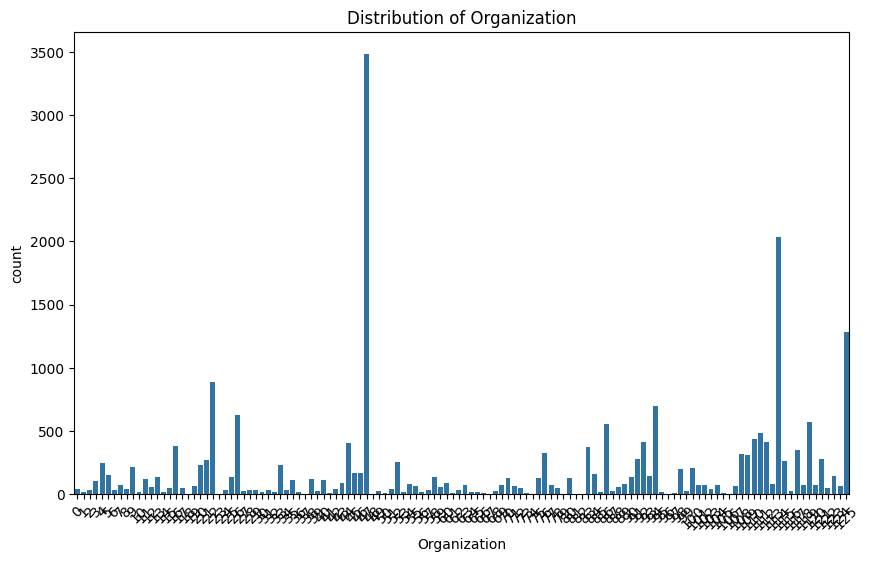

In [49]:
#Bar Plot of Categorical Features
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Organization')
plt.title('Distribution of Organization')
plt.xticks(rotation=45)
plt.show()


# Pairplot for Relationships Between Numerical Variables

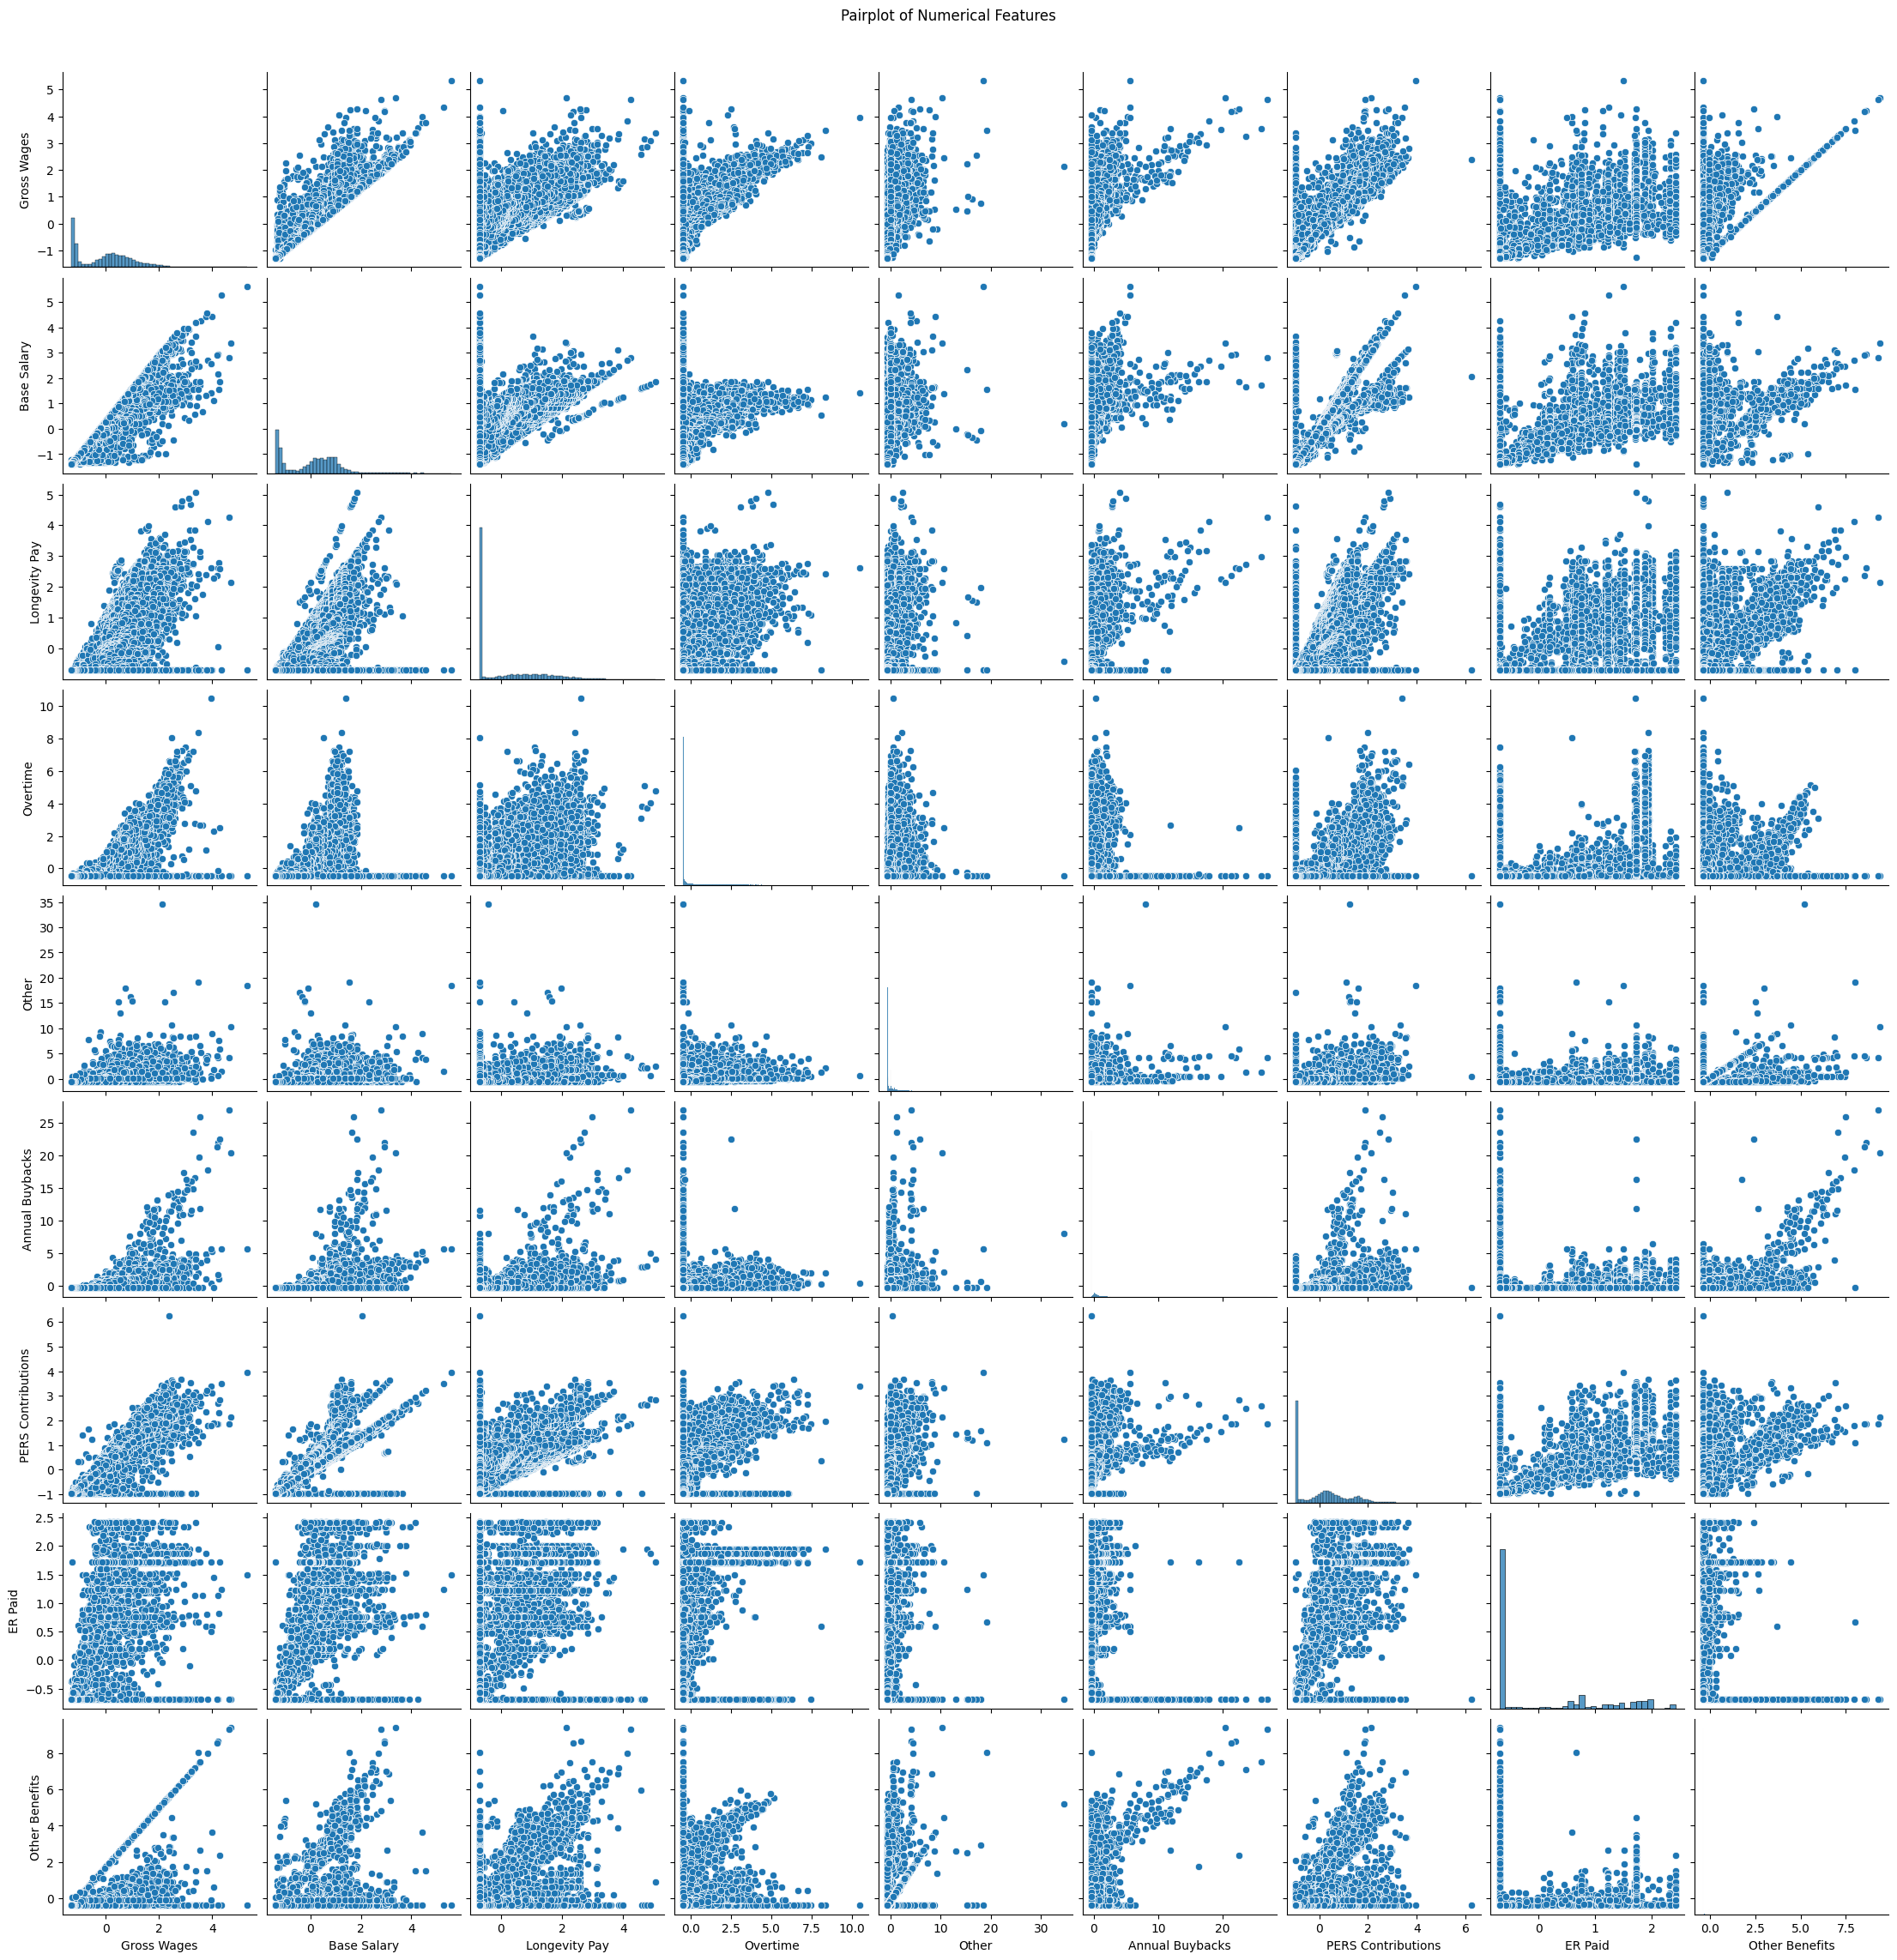

In [50]:
#Pairplot for Relationships Between Numerical Variables
sns.pairplot(df[numerical_cols])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()
